In [ ]:
# Install required packages
!pip install yfinance
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.3 MB/s eta 0:00:00


In [ ]:
# FIX: Force compatible versions of numpy and pmdarima
!pip install --upgrade --force-reinstall numpy==1.23.5 pmdarima==2.0.4

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.9 MB/s eta 0:00:00
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


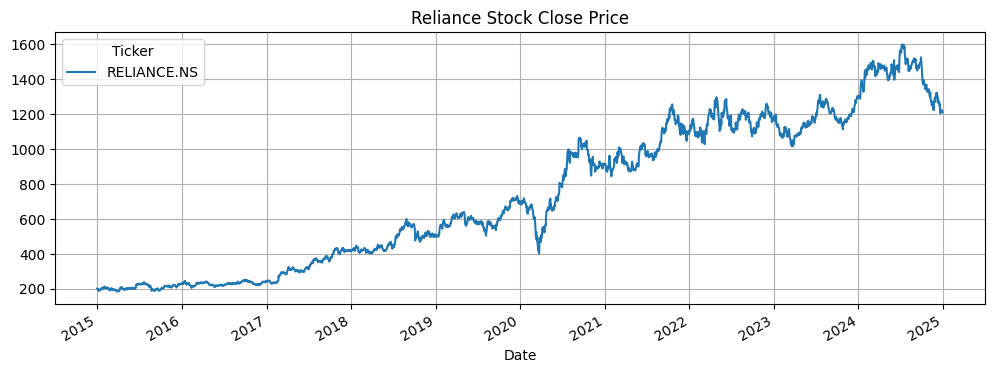

In [ ]:
# Download Reliance stock data
reliance = yf.download('RELIANCE.NS', start='2015-01-01', end='2024-12-31')

# Extract only the closing prices
close_prices = reliance['Close'].dropna()

# Optional: Visualize
close_prices.plot(title="Reliance Stock Close Price", figsize=(12, 4))
plt.grid()
plt.show()

In [ ]:
# Section: ARIMA Forecasting

In [ ]:
# Automatically find the best ARIMA model
stepwise_model = auto_arima(close_prices,
                             seasonal=False,  # non-seasonal ARIMA
                             trace=True,
                             suppress_warnings=True)

# Show model summary
print(stepwise_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19832.369, Time=2.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19830.430, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19832.264, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19832.272, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19830.703, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19830.739, Time=1.57 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 5.041 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2466
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9913.215
Date:                Wed, 11 Jun 2025   AIC                          19830.430
Time:                        08:45:01   BIC                          19842.050
Sample:                             0   HQIC                         19834.652
                               - 2466                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4100      0.272      1.508      0.132      -0.123

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


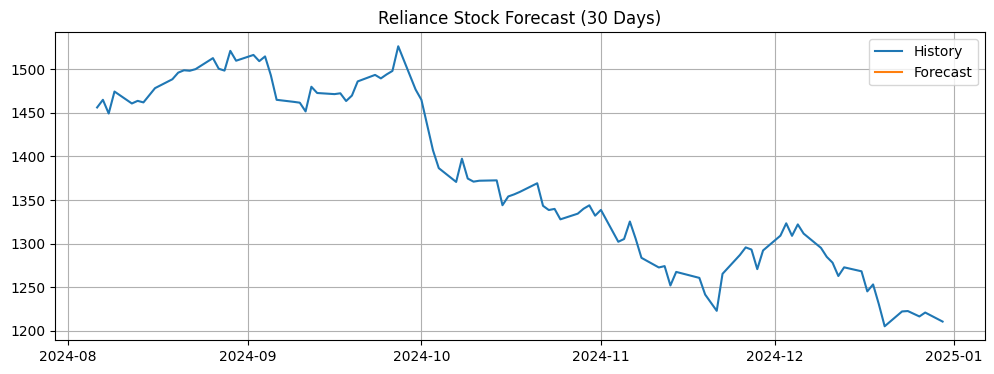

In [ ]:
# Forecast next 30 days
forecast = stepwise_model.predict(n_periods=30)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(close_prices[-100:], label='History')
plt.plot(pd.Series(forecast, index=pd.date_range(close_prices.index[-1], periods=30, freq='B')), label='Forecast')
plt.legend()
plt.title("Reliance Stock Forecast (30 Days)")
plt.grid()
plt.show()

ADF Statistic: -0.9219047688684616
p-value: 0.7806733059259188
Critical Values:
   1%: -3.4330088672375108
   5%: -2.8627146654531828
   10%: -2.5673953212600824
Data is non-stationary, consider differencing


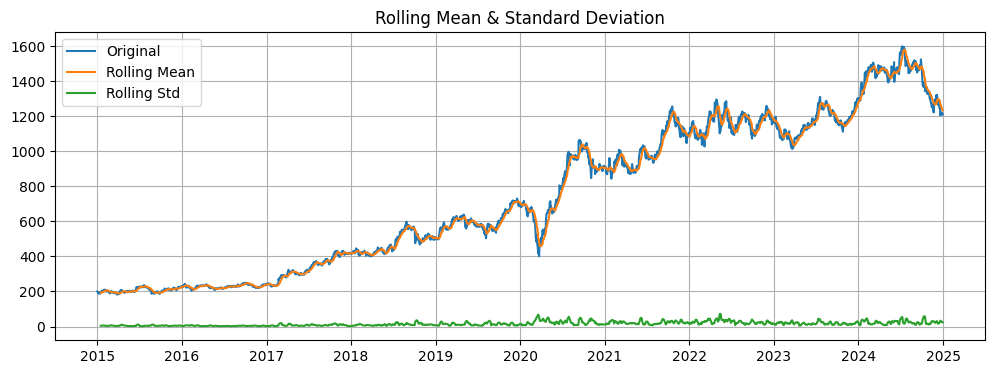

In [ ]:
# If not already imported
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Run ADF Test for stationarity
result = adfuller(close_prices)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is non-stationary, consider differencing")

# Plot Rolling Mean & Std Deviation
rolmean = close_prices.rolling(window=12).mean()
rolstd = close_prices.rolling(window=12).std()

plt.figure(figsize=(12, 4))
plt.plot(close_prices, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.title('Rolling Mean & Standard Deviation')
plt.legend()
plt.grid()
plt.show()

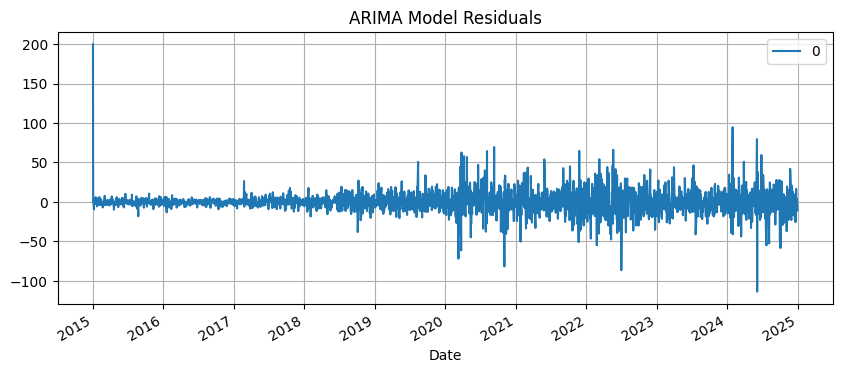

In [ ]:
# Residuals Check
residuals = pd.DataFrame(stepwise_model.resid())
residuals.plot(title="ARIMA Model Residuals", figsize=(10, 4))
plt.grid()
plt.show()

In [ ]:
# Section: SARIMA Forecasting

In [ ]:
from pmdarima import auto_arima

# auto_arima with seasonality enabled
sarima_model = auto_arima(
    close_prices,
    start_p=1, start_q=1,
    max_p=3, max_q=3,
    seasonal=True,
    m=12,  # assuming monthly seasonality (can adjust)
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    d=1, D=1,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# Model summary
print(sarima_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=21408.118, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=21404.123, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=20722.962, Time=1.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=21406.117, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20445.319, Time=2.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=17.19 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=7.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=20443.502, Time=2.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=20721.297, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=13.63 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=5.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=20445.323, Time=3.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=20447.318, Time=2.73 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=20445.492, Time=7.05 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]          
Total fit time: 69.027 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 2466
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -10218.751
Date:                            Wed, 11 Jun 2025   AIC                          20443.502
Time:                                    08:47:45   BIC                          20460.918
Sample:                                         0   HQIC                         20449.831
                                           - 2466                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


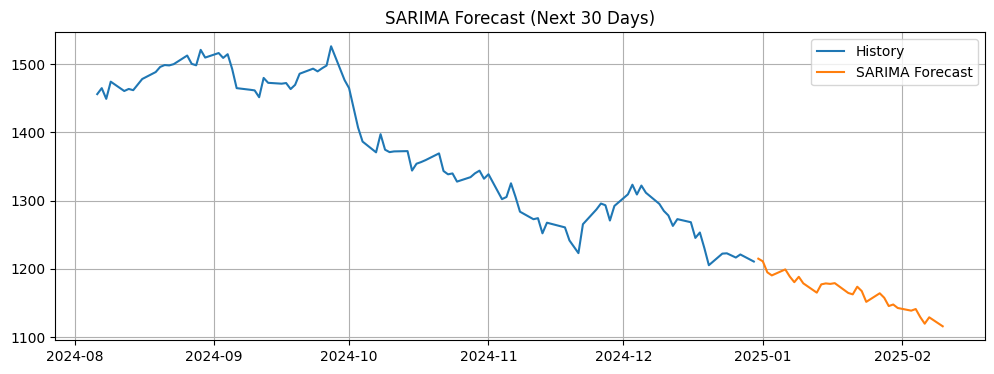

In [ ]:
# Forecast next 30 values
sarima_forecast = sarima_model.predict(n_periods=30)

# Create future date index
future_dates = pd.date_range(close_prices.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')

# Plot
plt.figure(figsize=(12, 4))
plt.plot(close_prices[-100:], label='History')
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.title("SARIMA Forecast (Next 30 Days)")
plt.grid()
plt.show()

SARIMA ADF Statistic: -0.9219047688684616
SARIMA p-value: 0.7806733059259188
Data is non-stationary (SARIMA)


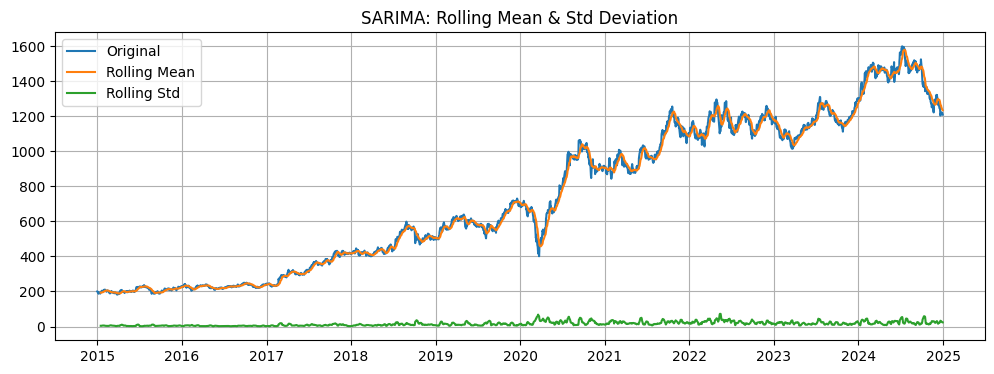

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity (again on same close_prices)
sarima_adf = adfuller(close_prices)
print("SARIMA ADF Statistic:", sarima_adf[0])
print("SARIMA p-value:", sarima_adf[1])
if sarima_adf[1] < 0.05:
    print("Data is stationary (SARIMA)")
else:
    print("Data is non-stationary (SARIMA)")

# Rolling Mean & Std Deviation
rolmean = close_prices.rolling(window=12).mean()
rolstd = close_prices.rolling(window=12).std()

plt.figure(figsize=(12, 4))
plt.plot(close_prices, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.title('SARIMA: Rolling Mean & Std Deviation')
plt.legend()
plt.grid()
plt.show()

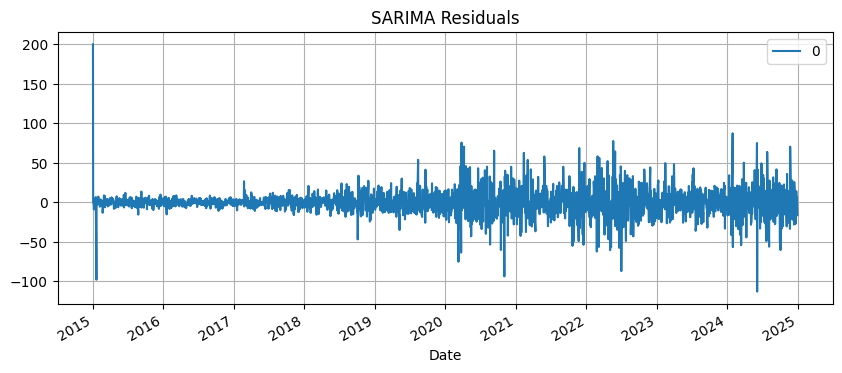

In [ ]:
# Residuals from the fitted model
sarima_residuals = pd.DataFrame(sarima_model.resid())

# Plot residuals
sarima_residuals.plot(title="SARIMA Residuals", figsize=(10, 4))
plt.grid()
plt.show()

In [ ]:
# Section: Prophet Forecasting

In [ ]:
from prophet import Prophet

# Prophet needs columns: 'ds' and 'y'
df_prophet = close_prices.reset_index()
df_prophet.columns = ['ds', 'y']
df_prophet.head()

,ds,y
0,2015-01-01,200.006195
1,2015-01-02,199.476852
2,2015-01-05,197.291840
3,2015-01-06,188.337860
4,2015-01-07,192.437546


In [ ]:
# Initialize and fit model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create future dataframe (30 business days ahead)
future = model_prophet.make_future_dataframe(periods=30)

# Make prediction
forecast = model_prophet.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0czbm5c1/o5a_tik7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0czbm5c1/u1nk8t6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21785', 'data', 'file=/tmp/tmp0czbm5c1/o5a_tik7.json', 'init=/tmp/tmp0czbm5c1/u1nk8t6b.json', 'output', 'file=/tmp/tmp0czbm5c1/prophet_modelvz6j_cfs/prophet_model-20250611084950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:49:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:49:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


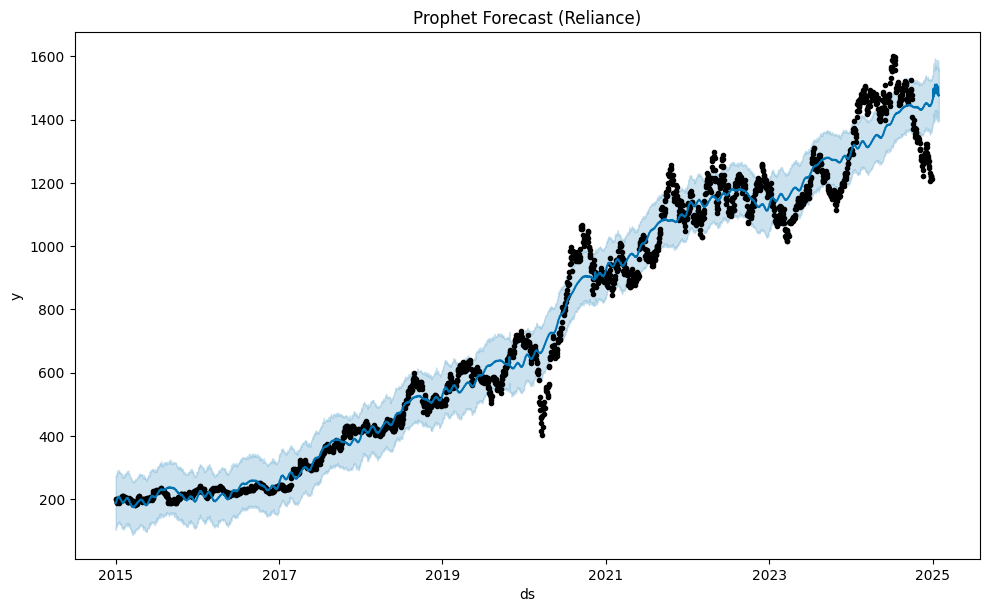

In [ ]:
# Plot entire forecast
model_prophet.plot(forecast)
plt.title("Prophet Forecast (Reliance)")
plt.grid()
plt.show()

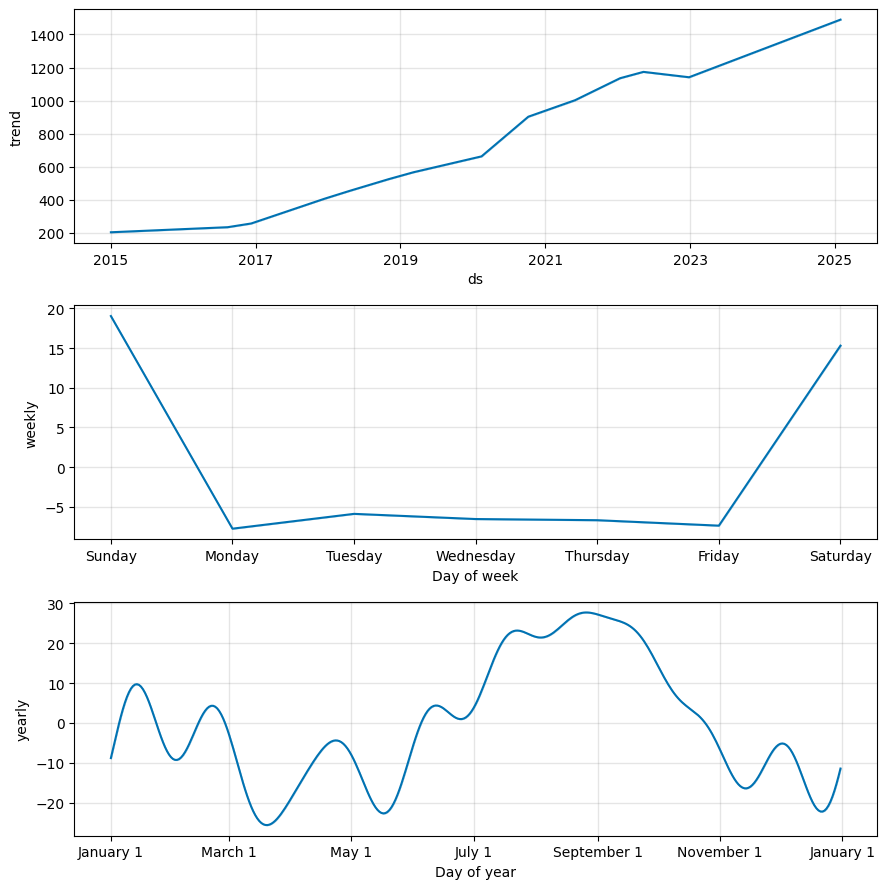

In [ ]:
# Show trend, weekly & yearly seasonality (if found)
model_prophet.plot_components(forecast)
plt.show()

Prophet ADF Statistic: -0.9219047688684616
Prophet p-value: 0.7806733059259188
Data is non-stationary (Prophet)


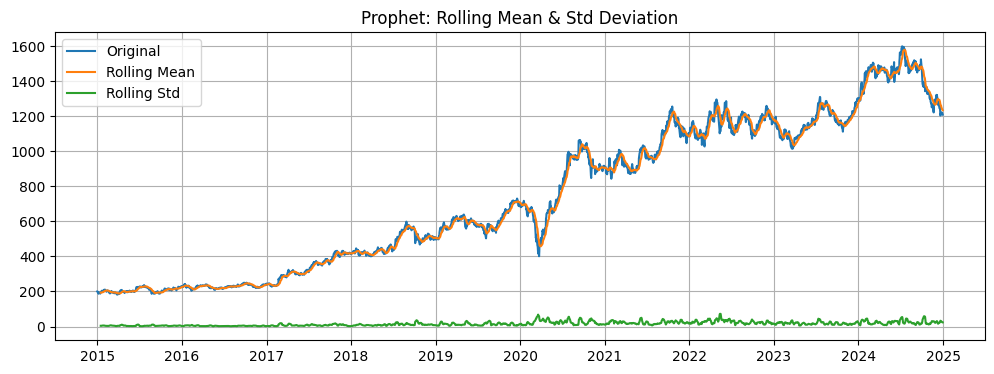

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF on same close_prices as Prophet uses same input
prophet_adf = adfuller(close_prices)

print("Prophet ADF Statistic:", prophet_adf[0])
print("Prophet p-value:", prophet_adf[1])
if prophet_adf[1] < 0.05:
    print("Data is stationary (Prophet)")
else:
    print("Data is non-stationary (Prophet)")

# Rolling Mean + Std
rolmean = close_prices.rolling(window=12).mean()
rolstd = close_prices.rolling(window=12).std()

plt.figure(figsize=(12, 4))
plt.plot(close_prices, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolstd, label='Rolling Std')
plt.title('Prophet: Rolling Mean & Std Deviation')
plt.legend()
plt.grid()
plt.show()

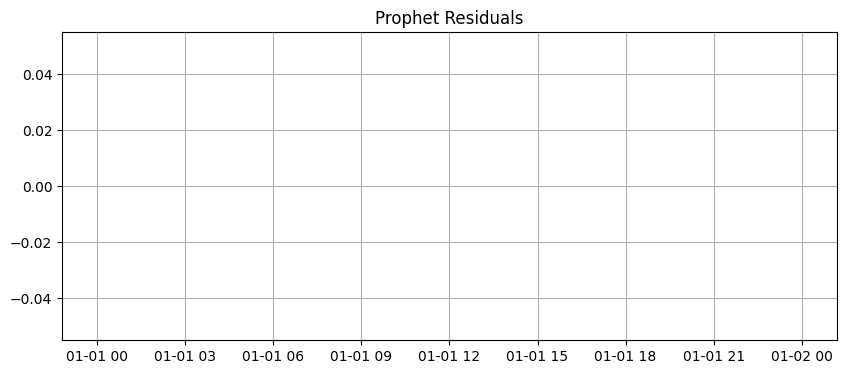

In [ ]:
# Get predicted values aligned to actual dates
predicted_values = forecast.set_index('ds').loc[close_prices.index, 'yhat']

# Calculate residuals
prophet_residuals = close_prices - predicted_values

# Plot residuals
plt.figure(figsize=(10, 4))
plt.plot(prophet_residuals)
plt.title("Prophet Residuals")
plt.grid()
plt.show()

In [ ]:
# Section: LSTM Forecasting